# Processing data for wave height forecast
In this notebook, we process the data that we use to train and fine tune our models. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.io as pio
import plotly.offline as poff
import seaborn as sns
pio.renderers.default = 'notebook' 
pio.templates.default = "seaborn"
poff.init_notebook_mode(connected=True)
plt.style.use('seaborn-v0_8-darkgrid')

## 1. Wave data

In [2]:
# Read raw data
# ==============================================================================
data_dir = 'Data/spain/four years'
file = '/17286_27577_3106036_WAVE_20200618145316_20240618145316.csv'

col_names = ['Fecha (GMT)',	'Altura Signif. del Oleaje(m)',	'Periodo Medio(s)', 'Periodo de Pico(s)', 'Direcc. Media de Proced.(0=N 90=E)',	'Mar de viento:  Altura signif. Espectral(m)',	'Mar de viento: Direcc. Media de Proced.(0=N 90=E)', 'Mar de fondo 1:  Altura signif. Espectral(m)', 'Mar de fondo 1:  Periodo Medio Espectral(s)',	'Mar de fondo 1: Direcc. Media de Proced.(0=N 90=E)', 'Mar de fondo 2:  Altura signif. Espectral(m)', 'Mar de fondo 2:  Periodo Medio Espectral(s)', 'Mar de fondo 2: Direcc. Media de Proced.(0=N 90=E)']
wave_original = pd.read_csv(data_dir + file, 
                 skiprows = 2, 
                 sep = '\t',
                 header = None,
                 names = col_names)

wave_original['datetime'] = pd.to_datetime(wave_original['Fecha (GMT)'].str.replace(r'\s+', ' ', regex=True), format='%Y %m %d %H')

wave_original.head()

,Fecha (GMT),Altura Signif. del Oleaje(m),Periodo Medio(s),Periodo de Pico(s),Direcc. Media de Proced.(0=N 90=E),Mar de viento: Altura signif. Espectral(m),Mar de viento: Direcc. Media de Proced.(0=N 90=E),Mar de fondo 1: Altura signif. Espectral(m),Mar de fondo 1: Periodo Medio Espectral(s),Mar de fondo 1: Direcc. Media de Proced.(0=N 90=E),Mar de fondo 2: Altura signif. Espectral(m),Mar de fondo 2: Periodo Medio Espectral(s),Mar de fondo 2: Direcc. Media de Proced.(0=N 90=E),datetime
0,2020 06 18 00,0.78,4.92,6.21,333,0.0,180,0.75,4.75,331,0.21,13.74,356.0,2020-06-18 00:00:00
1,2020 06 18 01,0.76,5.06,6.21,334,0.0,180,0.72,4.82,331,0.24,13.58,356.0,2020-06-18 01:00:00
2,2020 06 18 02,0.74,5.16,6.21,334,0.0,180,0.69,4.84,331,0.27,13.45,355.0,2020-06-18 02:00:00
3,2020 06 18 03,0.73,5.22,6.21,335,0.0,180,0.67,4.83,331,0.30,13.31,355.0,2020-06-18 03:00:00
4,2020 06 18 04,0.73,5.28,13.32,336,0.0,180,0.64,4.73,331,0.64,25.96,355.0,2020-06-18 04:00:00


In [46]:
# Slice off variable of interest
# ==============================================================================
df_wave = wave_original[['datetime', 'Altura Signif. del Oleaje(m)', 'Periodo Medio(s)', 'Direcc. Media de Proced.(0=N 90=E)']].copy()
df_wave.rename(columns = {
    'Altura Signif. del Oleaje(m)':'wave_height',
    'Periodo Medio(s)': 'wave_period', 
    'Direcc. Media de Proced.(0=N 90=E)':'wave_direction'
    }, inplace = True)
df_wave.sort_values(by=['datetime'], inplace=True)
df_wave.set_index(keys = 'datetime', inplace=True)
df_wave = df_wave.asfreq('60min')

print(df_wave.shape)
df_wave.head(10)

(35088, 3)


,wave_height,wave_period,wave_direction
datetime,,,
2020-06-18 00:00:00,0.78,4.92,333.0
2020-06-18 01:00:00,0.76,5.06,334.0
2020-06-18 02:00:00,0.74,5.16,334.0
2020-06-18 03:00:00,0.73,5.22,335.0
2020-06-18 04:00:00,0.73,5.28,336.0
2020-06-18 05:00:00,0.73,5.34,336.0
2020-06-18 06:00:00,0.73,5.40,337.0
2020-06-18 07:00:00,0.74,5.45,337.0
2020-06-18 08:00:00,0.74,5.41,338.0


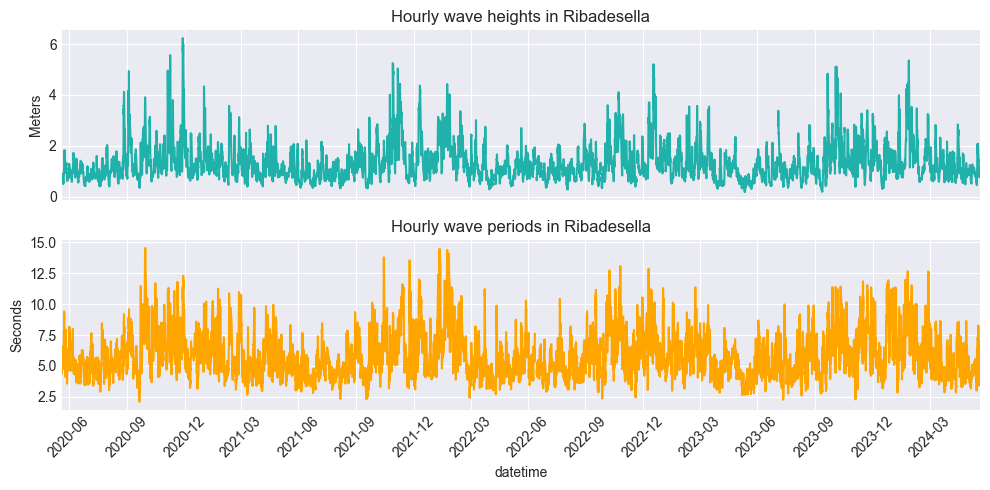

In [47]:
# Plot raw data
# ==============================================================================
fig, ax = plt.subplots(2, 1, figsize=(10, 5), sharex=True)  # Share x-axis

# Plot data
df_wave['wave_height'].plot(ax=ax[0], color='lightseagreen')
df_wave['wave_period'].plot(ax=ax[1], color='orange')

# Set titles and labels
ax[0].set_title('Hourly wave heights in Ribadesella')
ax[1].set_title('Hourly wave periods in Ribadesella')
ax[0].set_ylabel('Meters')
ax[1].set_ylabel('Seconds')

# Customize x-axis ticks and labels
xticks = pd.date_range(start=df_wave.index.min(), end=df_wave.index.max(), freq='3M')
ax[1].set_xticks(xticks)
ax[1].set_xticklabels(xticks.strftime('%Y-%m'), rotation=45)

# Add grid
for axis in ax:
    axis.grid(True)

plt.tight_layout()  # Adjust layout
plt.show()  # Display the plot


### Dealing with null values. 
The raw data seems to have a few missing values. Since there aren't a lot relative to the sample size, I am going to impute them with the weekly average. I don't think this will have a huge impact on the predictive ability of the model. More importantly, the null values do not seem to leak across sets.


In [41]:
for col in df_wave.columns:
    print(df_wave[col].isnull().value_counts())


wave_height
False    34848
True       240
Name: count, dtype: int64
period
False    34848
True       240
Name: count, dtype: int64
wave_direction
False    34848
True       240
Name: count, dtype: int64


In [42]:
df_wave[df_wave['wave_height'].isnull()]

,wave_height,period,wave_direction
datetime,,,
2020-08-25 13:00:00,NaN,NaN,NaN
2020-08-25 14:00:00,NaN,NaN,NaN
2020-08-25 15:00:00,NaN,NaN,NaN
2020-08-25 16:00:00,NaN,NaN,NaN
2020-08-25 17:00:00,NaN,NaN,NaN
...,...,...,...
2023-11-16 20:00:00,NaN,NaN,NaN
2023-11-16 21:00:00,NaN,NaN,NaN
2023-11-16 22:00:00,NaN,NaN,NaN


In [43]:
df_wave[df_wave['wave_height'].isnull() & 
                 (df_wave.index.month.isin([7, 8, 9])) & 
                 (df_wave.index.year == 2023)]

,wave_height,period,wave_direction
datetime,,,
2023-08-02 01:00:00,NaN,NaN,NaN
2023-08-02 02:00:00,NaN,NaN,NaN
2023-08-02 03:00:00,NaN,NaN,NaN
2023-08-02 04:00:00,NaN,NaN,NaN
2023-08-02 05:00:00,NaN,NaN,NaN
2023-08-02 06:00:00,NaN,NaN,NaN
2023-08-02 07:00:00,NaN,NaN,NaN
2023-08-02 08:00:00,NaN,NaN,NaN
2023-08-02 09:00:00,NaN,NaN,NaN


In [48]:
# Impute missing values
# ==============================================================================
def fill_null_with_weekly_average(df, column_names):
    # Ensure the index is a DateTimeIndex
    if not isinstance(df.index, pd.DatetimeIndex):
        df.index = pd.to_datetime(df.index)

    for column_name in column_names:

        # Calculate the weekly average
        weekly_avg = df[column_name].resample('W').mean()

        # Forward-fill the weekly average to match the original index
        weekly_avg_filled = weekly_avg.reindex(df.index, method='ffill')

        # Fill null values in the original series with the corresponding weekly average
        df[column_name].fillna(weekly_avg_filled, inplace=True)

    return df

df_wave = fill_null_with_weekly_average(df_wave, ['wave_height', 'wave_period', 'wave_direction'])

df_wave.isnull().value_counts()

wave_height  wave_period  wave_direction
False        False        False             35088
Name: count, dtype: int64

## 2. Water temperature

In [10]:
# Read raw data
# ==============================================================================
data_dir = 'Data/spain/four years'
file = '/17286_27578_3106036_WATER_TEMP_20200618145316_20240618145316.csv'

col_names = ['Fecha (GMT)',	'Temperatura del Agua(¬∫C)']
temp_original = pd.read_csv(data_dir + file, 
                 skiprows = 2, 
                 sep = '\t',
                 header = None,
                 names = col_names)

temp_original['datetime'] = pd.to_datetime(temp_original['Fecha (GMT)'].str.replace(r'\s+', ' ', regex=True), format='%Y %m %d %H')

temp_original.head()

,Fecha (GMT),Temperatura del Agua(¬∫C),datetime
0,2020 06 18 00,17.592,2020-06-18 00:00:00
1,2020 06 18 01,17.560,2020-06-18 01:00:00
2,2020 06 18 02,17.536,2020-06-18 02:00:00
3,2020 06 18 03,17.520,2020-06-18 03:00:00
4,2020 06 18 04,17.512,2020-06-18 04:00:00


In [13]:
df_temp = temp_original.drop(columns = ['Fecha (GMT)']).copy()
df_temp.rename(columns = {
    'Temperatura del Agua(¬∫C)':'water_temp'
}, inplace = True)
df_temp.sort_values(by=['datetime'], inplace=True)
df_temp.set_index(keys = 'datetime', inplace=True)
df_temp = df_temp.asfreq('60min')

print(df_temp.shape)
df_temp.head(10)

(35088, 1)


,water_temp
datetime,
2020-06-18 00:00:00,17.592
2020-06-18 01:00:00,17.560
2020-06-18 02:00:00,17.536
2020-06-18 03:00:00,17.520
2020-06-18 04:00:00,17.512
2020-06-18 05:00:00,17.504
2020-06-18 06:00:00,17.493
2020-06-18 07:00:00,17.475
2020-06-18 08:00:00,17.455


In [15]:
df_temp.shape[0] == df_wave.shape[0]

True

In [17]:
df_temp.isnull().value_counts()

water_temp
False         34584
True            504
Name: count, dtype: int64

## 3. Wind

In [25]:
# Read raw data
# ==============================================================================
data_dir = 'Data/spain/four years'
file = '/17286_27575_3106036_WIND_20200618145316_20240618145316.csv'

col_names = ['Fecha (GMT)',	'Velocidad del viento(m/s)', 'Direc. de proced. del Viento(0=N 90=E)']
wind_original = pd.read_csv(data_dir + file, 
                 skiprows = 2, 
                 sep = '\t',
                 header = None,
                 names = col_names)

wind_original['datetime'] = pd.to_datetime(wind_original['Fecha (GMT)'].str.replace(r'\s+', ' ', regex=True), format='%Y %m %d %H')

wind_original.head()

,Fecha (GMT),Velocidad del viento(m/s),Direc. de proced. del Viento(0=N 90=E),datetime
0,2020 06 18 00,1.82,232,2020-06-18 00:00:00
1,2020 06 18 01,1.40,230,2020-06-18 01:00:00
2,2020 06 18 02,1.37,251,2020-06-18 02:00:00
3,2020 06 18 03,1.46,227,2020-06-18 03:00:00
4,2020 06 18 04,1.88,228,2020-06-18 04:00:00


In [26]:
# Format
# ==============================================================================
df_wind = wind_original.drop(columns = ['Fecha (GMT)']).copy()
df_wind.rename(columns = {
    'Velocidad del viento(m/s)':'wind_speed',
    'Direc. de proced. del Viento(0=N 90=E)':'wind_direction'
}, inplace = True)
df_wind.sort_values(by=['datetime'], inplace=True)
df_wind.set_index(keys = 'datetime', inplace=True)
df_wind = df_wind.asfreq('60min')

print(df_wind.shape)
df_wind.head(10)

(35088, 2)


,wind_speed,wind_direction
datetime,,
2020-06-18 00:00:00,1.82,232.0
2020-06-18 01:00:00,1.40,230.0
2020-06-18 02:00:00,1.37,251.0
2020-06-18 03:00:00,1.46,227.0
2020-06-18 04:00:00,1.88,228.0
2020-06-18 05:00:00,2.24,229.0
2020-06-18 06:00:00,2.03,227.0
2020-06-18 07:00:00,1.67,262.0
2020-06-18 08:00:00,2.80,303.0


In [27]:
df_wind.shape[0] == df_wave.shape[0]

True

In [29]:
for col in df_wind.columns:
    print(df_wind[col].isnull().value_counts())

wind_speed
False    34848
True       240
Name: count, dtype: int64
wind_direction
False    34848
True       240
Name: count, dtype: int64


## 4. Currents

In [32]:
# Read raw data
# ==============================================================================
data_dir = 'Data/spain/four years'
file = '/17286_27576_3106036_CURRENTS_20200618145316_20240618145316.csv'

col_names = ['Fecha (GMT)',	'Velocidad media de Corriente(m/s)', 'Dir. de prop. de la Corriente (0=N 90=E)']
curr_original = pd.read_csv(data_dir + file, 
                 skiprows = 2, 
                 sep = '\t',
                 header = None,
                 names = col_names)

curr_original['datetime'] = pd.to_datetime(curr_original['Fecha (GMT)'].str.replace(r'\s+', ' ', regex=True), format='%Y %m %d %H')

curr_original.head()

,Fecha (GMT),Velocidad media de Corriente(m/s),Dir. de prop. de la Corriente (0=N 90=E),datetime
0,2020 06 18 00,0.212,105.55,2020-06-18 00:00:00
1,2020 06 18 01,0.206,100.62,2020-06-18 01:00:00
2,2020 06 18 02,0.203,95.08,2020-06-18 02:00:00
3,2020 06 18 03,0.206,90.01,2020-06-18 03:00:00
4,2020 06 18 04,0.210,87.01,2020-06-18 04:00:00


In [33]:
# Format
# ==============================================================================
df_curr = curr_original.drop(columns = ['Fecha (GMT)']).copy()
df_curr.rename(columns = {
    'Velocidad media de Corriente(m/s)':'current_speed',
    'Dir. de prop. de la Corriente (0=N 90=E)':'current_direction'
}, inplace = True)
df_curr.sort_values(by=['datetime'], inplace=True)
df_curr.set_index(keys = 'datetime', inplace=True)
df_curr = df_curr.asfreq('60min')

print(df_curr.shape)
df_curr.head(10)

(35088, 2)


,current_speed,current_direction
datetime,,
2020-06-18 00:00:00,0.212,105.55
2020-06-18 01:00:00,0.206,100.62
2020-06-18 02:00:00,0.203,95.08
2020-06-18 03:00:00,0.206,90.01
2020-06-18 04:00:00,0.210,87.01
2020-06-18 05:00:00,0.215,87.88
2020-06-18 06:00:00,0.220,92.87
2020-06-18 07:00:00,0.226,100.42
2020-06-18 08:00:00,0.232,108.05


In [34]:
df_curr.shape[0] == df_wave.shape[0]

True

In [35]:
for col in df_curr.columns:
    print(df_curr[col].isnull().value_counts())

current_speed
False    34584
True       504
Name: count, dtype: int64
current_direction
False    34584
True       504
Name: count, dtype: int64


## 5. Merge all

In [50]:
df_all = df_wave.copy()
list_df = [df_curr, df_temp, df_wind]
for _df in list_df:
    df_all = df_all.merge(right = _df, right_index = True, left_index = True)

In [51]:
df_all

,wave_height,wave_period,wave_direction,current_speed,current_direction,water_temp,wind_speed,wind_direction
datetime,,,,,,,,
2020-06-18 00:00:00,0.78,4.92,333.0,0.212,105.55,17.592,1.82,232.0
2020-06-18 01:00:00,0.76,5.06,334.0,0.206,100.62,17.560,1.40,230.0
2020-06-18 02:00:00,0.74,5.16,334.0,0.203,95.08,17.536,1.37,251.0
2020-06-18 03:00:00,0.73,5.22,335.0,0.206,90.01,17.520,1.46,227.0
2020-06-18 04:00:00,0.73,5.28,336.0,0.210,87.01,17.512,1.88,228.0
...,...,...,...,...,...,...,...,...
2024-06-18 19:00:00,0.93,3.61,21.0,0.136,253.02,17.337,7.65,24.0
2024-06-18 20:00:00,0.92,3.82,21.0,0.180,246.13,17.238,4.44,24.0
2024-06-18 21:00:00,0.86,4.08,19.0,0.212,244.99,17.229,0.80,96.0


In [53]:
# Cliclical encoding of direction features
# ==============================================================================

def cyclical_encoding(data: pd.Series, cycle_length: int) -> pd.DataFrame:
    """
    Encode a cyclical feature with two new features sine and cosine.
    The minimum value of the feature is assumed to be 0. The maximum value
    of the feature is passed as an argument.
      
    Parameters
    ----------
    data : pd.Series
        Series with the feature to encode.
    cycle_length : int
        The length of the cycle. For example, 12 for months, 24 for hours, etc.
        This value is used to calculate the angle of the sin and cos.

    Returns
    -------
    result : pd.DataFrame
        Dataframe with the two new features sin and cos.

    """

    sin = np.sin(2 * np.pi * data/cycle_length)
    cos = np.cos(2 * np.pi * data/cycle_length)
    result =  pd.DataFrame({
                  f"{data.name}_sin": sin,
                  f"{data.name}_cos": cos
              })

    return result

In [70]:
curr_enc = cyclical_encoding(df_all['current_direction'], cycle_length=360)